Chapter 10

# 给定矩形中的椭圆
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码用于展示不同相关系数 $\rho$ 值下二维正态分布的等高线（协方差椭圆）形状，直观表现 $X$ 和 $Y$ 两个随机变量之间的关系强度和方向。

1. **定义网格和参数**：通过 $x$ 和 $y$ 坐标在 $[-4, 4]$ 区间内生成的网格 $(xx, yy)$ 来计算二维正态分布在每个点的值。这里 $X$ 的标准差 $\sigma_X=1$，$Y$ 的标准差 $\sigma_Y=2$。

2. **计算等高线公式**：定义不同的相关系数 $\rho$（范围为 -0.8 到 0.8），使用协方差椭圆公式：
   $$
   \frac{xx^2}{\sigma_X^2} - 2\rho \frac{xx \cdot yy}{\sigma_X \sigma_Y} + \frac{yy^2}{\sigma_Y^2} = 1
   $$
   该公式表示 $X$ 和 $Y$ 在给定 $\rho$ 下的联合等高线，随着 $\rho$ 的变化，等高线的方向和形状也会发生改变。这里，$-2\rho \frac{xx \cdot yy}{\sigma_X \sigma_Y}$ 项反映了 $X$ 和 $Y$ 的线性相关性。

3. **绘制不同 $\rho$ 值下的协方差椭圆**：
   - 在主图中，通过循环将不同 $\rho$ 值的等高线绘制在相应的子图上，每个子图标题显示对应的 $\rho$ 值。
   - 通过 `Rectangle` 绘制的黑色矩形边框，用来表示 $X$ 和 $Y$ 变量标准差的范围 $[-\sigma_X, \sigma_X]$ 和 $[-\sigma_Y, \sigma_Y]$。

4. **合并图**：最后，将所有 $\rho$ 的等高线绘制在同一坐标系中以便比较。

此图展示了在不同相关性条件下，二维正态分布的等高线形状随 $\rho$ 值变化的情况。当 $\rho = 0$ 时，等高线为圆形；当 $\rho$ 趋近于 1 或 -1 时，椭圆更长，表明 $X$ 和 $Y$ 间存在较强的线性关系。

这段代码用于展示不同相关系数 $\rho$ 对椭圆形状的影响，基于给定的标准差和相关系数绘制了一系列椭圆的轮廓图。椭圆代表了二维正态分布中的等高线，反映了不同 $\rho$ 值下的协方差结构。通过分别绘制每个 $\rho$ 值对应的椭圆轮廓以及组合图形，展示了相关系数对椭圆形状的影响。

### 椭圆方程
椭圆的方程为：
$$
\frac{(x / \sigma_X)^2 - 2 \rho (x / \sigma_X)(y / \sigma_Y) + (y / \sigma_Y)^2}{1 - \rho^2} = 1
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

## 准备数据

In [2]:
x = np.linspace(-4,4,num = 201)  # 创建 x 的线性空间
y = np.linspace(-4,4,num = 201)  # 创建 y 的线性空间
sigma_X = 1  # 设置 X 的标准差
sigma_Y = 2  # 设置 Y 的标准差

In [3]:
xx,yy = np.meshgrid(x,y)  # 创建网格数据

kk = np.linspace(-0.8,0.8,num = 9)  # 生成不同的相关系数值

## 分别绘制不同相关系数下的椭圆轮廓

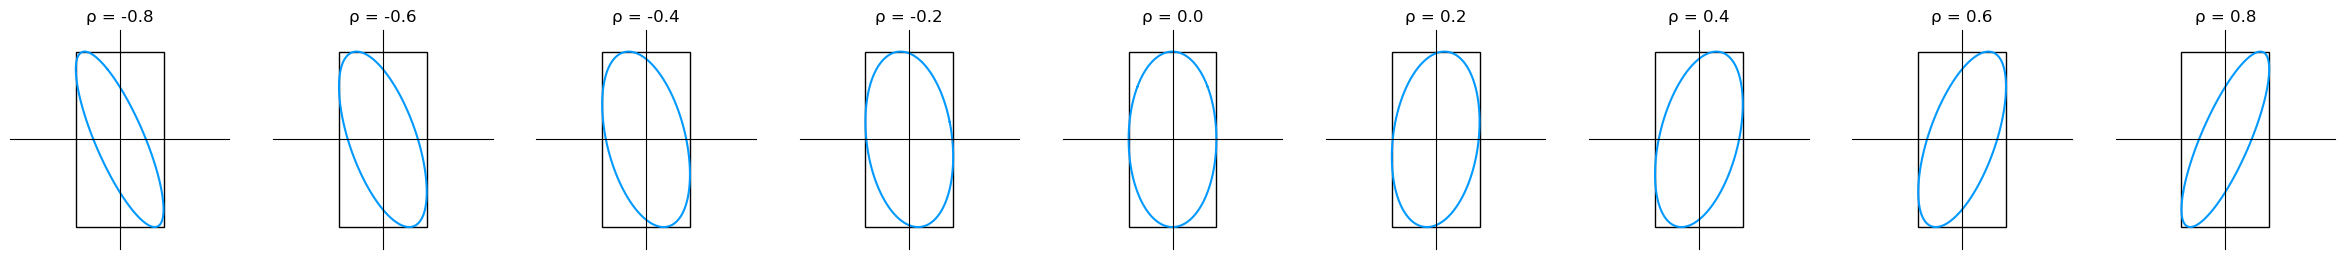

In [4]:
fig = plt.figure(figsize=(30,5))  # 设置图形尺寸

for i in range(0,len(kk)):
    
    k = kk[i]  # 当前的相关系数值
    ax = fig.add_subplot(1,len(kk),int(i+1))  # 创建子图
    ellipse = ((xx/sigma_X)**2 - 2*k*(xx/sigma_X)*(yy/sigma_Y) + (yy/sigma_Y)**2)/(1 - k**2)  # 计算椭圆轮廓
    
    plt.contour(xx,yy,ellipse,levels = [1], colors = '#0099FF')  # 绘制椭圆轮廓线

    rect = Rectangle(xy = [- sigma_X, - sigma_Y] , 
                     width = 2*sigma_X, 
                     height = 2*sigma_Y,
                     edgecolor = 'k',facecolor="none")  # 创建矩形边界框
    
    ax.add_patch(rect)  # 添加矩形到子图中

    ax.set_xlim([-2.5,2.5])  # 设置 X 轴范围
    ax.set_ylim([-2.5,2.5])  # 设置 Y 轴范围
    ax.set_xticks([])  # 隐藏 X 轴刻度
    ax.set_yticks([])  # 隐藏 Y 轴刻度
    ax.spines['left'].set_position('zero')  # 设置左侧轴位置
    ax.spines['right'].set_color('none')  # 隐藏右侧轴
    ax.spines['top'].set_position('zero')  # 设置上侧轴位置
    ax.spines['bottom'].set_color('none')  # 隐藏下侧轴
    plt.gca().set_aspect('equal', adjustable='box')  # 设置图形比例
    ax.set_title('\u03C1 = %0.1f' %k)  # 设置标题

## 绘制所有相关系数下的组合椭圆图

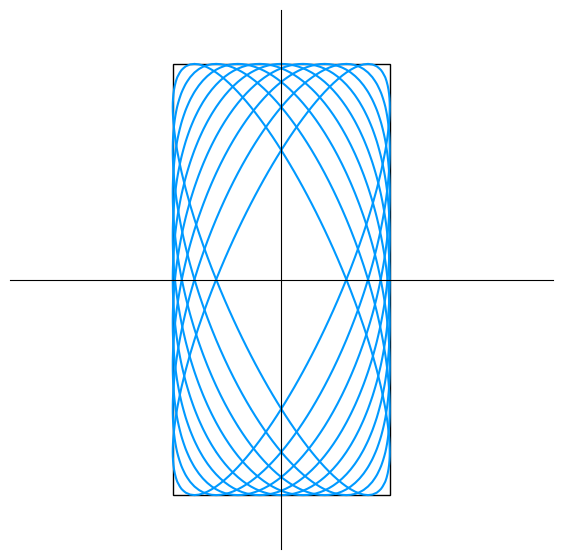

In [5]:
fig, ax = plt.subplots(figsize=(7, 7))  # 创建图形和坐标轴

for i in range(0, len(kk)):
    
    k = kk[i]  # 当前的相关系数值
    ellipse = ((xx/sigma_X)**2 - 2*k*(xx/sigma_X)*(yy/sigma_Y) + (yy/sigma_Y)**2)/(1 - k**2)  # 计算椭圆轮廓
    
    plt.contour(xx, yy, ellipse, levels = [1], colors = '#0099FF')  # 绘制椭圆轮廓线

rect = Rectangle(xy = [- sigma_X, - sigma_Y] , 
                 width = 2*sigma_X, 
                 height = 2*sigma_Y,
                 edgecolor = 'k', facecolor="none")  # 创建矩形边界框
ax.add_patch(rect)  # 添加矩形到图形中

ax.set_xlim([-2.5,2.5])  # 设置 X 轴范围
ax.set_ylim([-2.5,2.5])  # 设置 Y 轴范围
ax.set_xticks([])  # 隐藏 X 轴刻度
ax.set_yticks([])  # 隐藏 Y 轴刻度
ax.spines['left'].set_position('zero')  # 设置左侧轴位置
ax.spines['right'].set_color('none')  # 隐藏右侧轴
ax.spines['top'].set_position('zero')  # 设置上侧轴位置
ax.spines['bottom'].set_color('none')  # 隐藏下侧轴